# TP 1: Practical introduction to Machine Learning -Unsupervised learning

## Import

In [11]:
# for 1 - Datasets
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

# 2 - Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score

##  1 - Datasets

#### Question 1.3.1

In [12]:
# Load of the temper dataset
temper_data = np.load("temper.npz")
x1 = temper_data["data"][:, :-2]
lati_longi = temper_data["data"][:, -2:]
# Load of the digits dataset
digits_data = np.load("digits.npz")

# split and pre-processing
x2, y2 = digits_data["x"]/255, digits_data["y"]/255
xt2, yt2 = digits_data["xt"]/255, digits_data["yt"]/255

FileNotFoundError: [Errno 2] No such file or directory: 'temper.npz'

#### Question 1.3.2 and 1.3.3

In [4]:
# Temper data
print(f"The mean of the temper data is: {x1.mean():0.2f} \nThe standard deviation of the temper data is : {x1.std():0.2f}")
# Digits data
print(f"The mean of the digits data is: {x2.mean():0.2f} \nThe standard deviation of the digits data is : {x2.std():0.2f}")

The mean of the temper data is: 11.81 
The standard deviation of the temper data is : 5.91
The mean of the digits data is: 0.11 
The standard deviation of the digits data is : 0.29


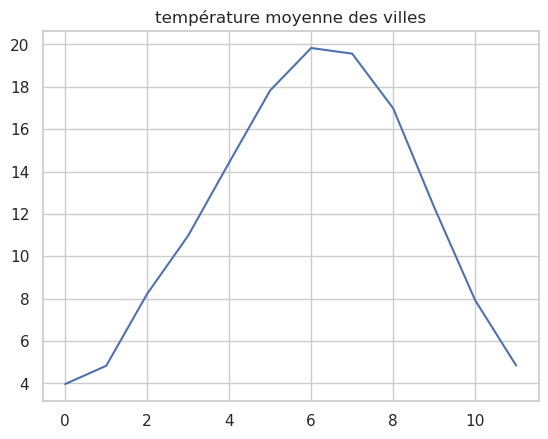

In [91]:
# Plot de la température moyenne par mois
plt.plot(np.arange(12) , x1.mean(axis=0),)
plt.title("température moyenne des villes")
plt.show()

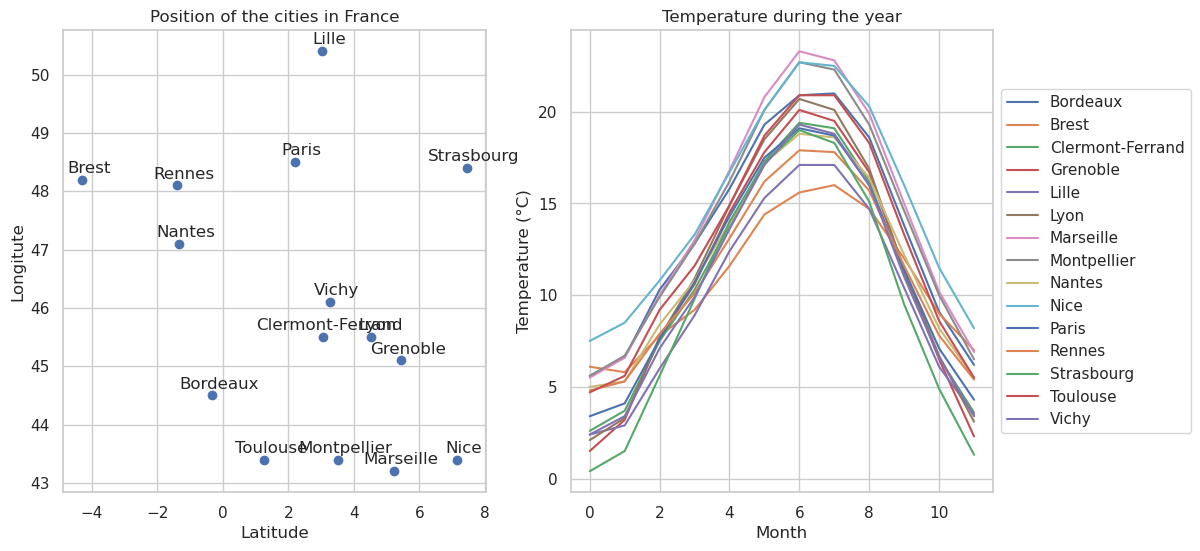

In [41]:
### Plot of the 2 figures of temper data

fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

ax1.scatter(lati_longi[:, 1], lati_longi[:, 0])
for i, label in enumerate(temper_data["villes"]):
    ax1.annotate(label, (lati_longi[i, 1], lati_longi[i, 0]), textcoords="offset points", xytext=(5,5), ha='center')

for i in range(x1.shape[0]):
    ax2.plot(np.arange(12) , x1[i, :], label = temper_data["villes"][i])


ax1.set_title('Position of the cities in France')
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Longitute")

ax2.set_title("Temperature during the year")
ax2.set_ylabel("Temperature (°C)")
ax2.set_xlabel("Month")

# Move the legend to the side of ax2
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

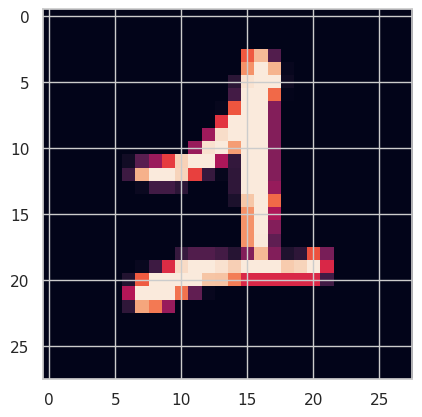

In [6]:
# Plot of a digit picture
plt.imshow(x2[5].reshape(28,28))

On reshape le vecteur de taille 784 en (28, 28) car la racine carré de 784 est 28. Nous  distinguons clairement un "1".

## 2 - Clustering 

### 2.1

#### question 2.1.1

In [136]:
# Initialize KMeans
kmeans = KMeans(n_clusters=3, n_init = "auto",)

# Temper data
kmeans_x1 = kmeans.fit(x1)
centroids_x1 = kmeans_x1.cluster_centers_
class_x1 = kmeans_x1.predict(x1)

# Digits data
kmeans_x2 = kmeans.fit(x2)
centroids_x2 = kmeans_x2.cluster_centers_
class_x2 = kmeans_x2.predict(x2)

#### question 2.1.2 (temper data)

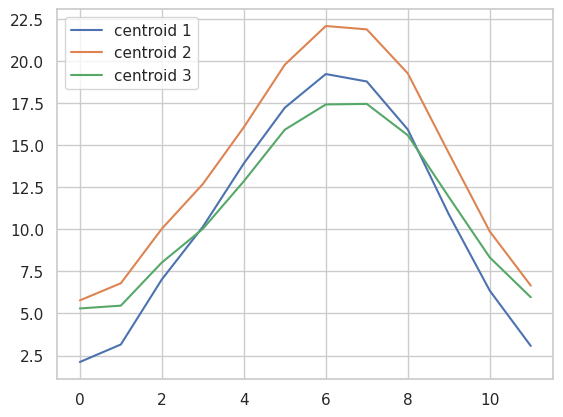

In [35]:
# Plot of the centroids
for i in range(centroids_x1.shape[0]):
    plt.plot(np.arange(12), centroids_x1[i], label = f"centroid {i+1}")
plt.title("Temperature during the year of centroids")
plt.legend()
plt.show()

We distinguish 3 clusters of major cities in France. There are cities where it is generally warm (centroid 2), cities where it is very cold in winter and hot in summer (centroid 1), and finally, cities that have fairly moderate temperatures throughout the year compared to the others (centroid 3).

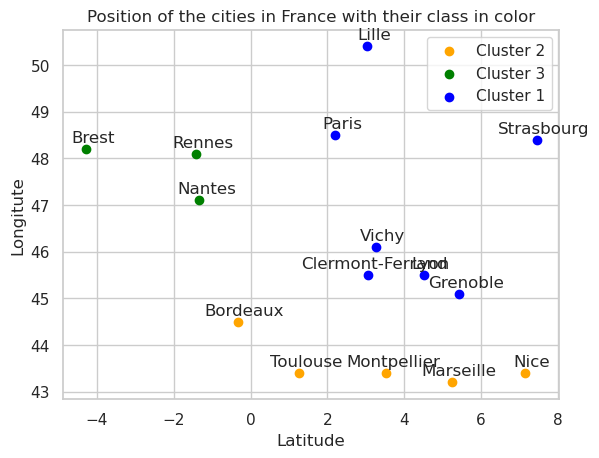

In [58]:
### Plot of the position of the cities in France with their class in color

colors = ["blue", "orange", "green"] 
class_labels = {0: "Cluster 1", 1: "Cluster 2", 2: "Cluster 3"}  # Map each class to a label

plotted_classes = set()

for i, label in enumerate(temper_data["villes"]):
    class_i = class_x1[i]
    
     # Scatter plot of the city with the color for its class
    if class_i not in plotted_classes:
        # If the class hasn't been plotted yet, add the label
        plt.scatter(lati_longi[i, 1], lati_longi[i, 0], c=colors[class_i], label=class_labels[class_i])
        plotted_classes.add(class_i)  # Mark the class as plotted
    else:
        # If the class has been plotted, don't add the label
        plt.scatter(lati_longi[i, 1], lati_longi[i, 0], c=colors[class_i])
    
    # Annotate each city   
    plt.annotate(label, (lati_longi[i, 1], lati_longi[i, 0]), textcoords="offset points", xytext=(5,5), ha='center')



plt.title('Position of the cities in France with their class in color')
plt.xlabel("Latitude")
plt.ylabel("Longitute")
plt.legend()
plt.show()

This plot confirms my observation from the previous plot. We can see that the clusters align with the geographical location of the cities: Southern cities are generally warm. Cities in Brittany are mild in summer and not too cold in winter. Cities in the North, the center, the East, and in the mountains are very cold in winter and quite warm in summer.

#### question 2.1.2 (digits data)

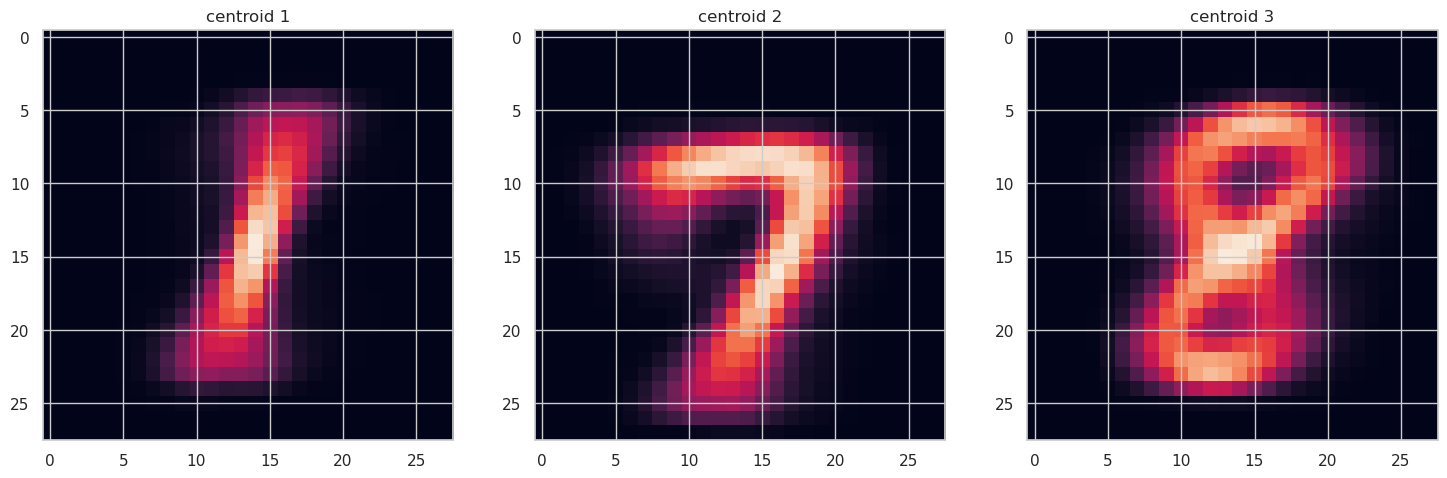

In [69]:
# plot of the centroids

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

ax1.imshow(centroids_x2[0].reshape(28,28))
ax2.imshow(centroids_x2[1].reshape(28,28))
ax3.imshow(centroids_x2[2].reshape(28,28))

ax1.set_title("centroid 1")
ax2.set_title("centroid 2")
ax3.set_title("centroid 3")
plt.show()

We decipher respectively a "1", "7" and "8", which is adequate with our data since they contain only these digits.

In [88]:
# Measure the goodness of the clustering with the ground truth y2
adjusted_mutual_info_score(y2.flatten()*255, class_x2)

np.float64(0.714533554809664)

This score indicate that the clustering is good but not perfect. link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html

#### question 2.1.3 (temper data)

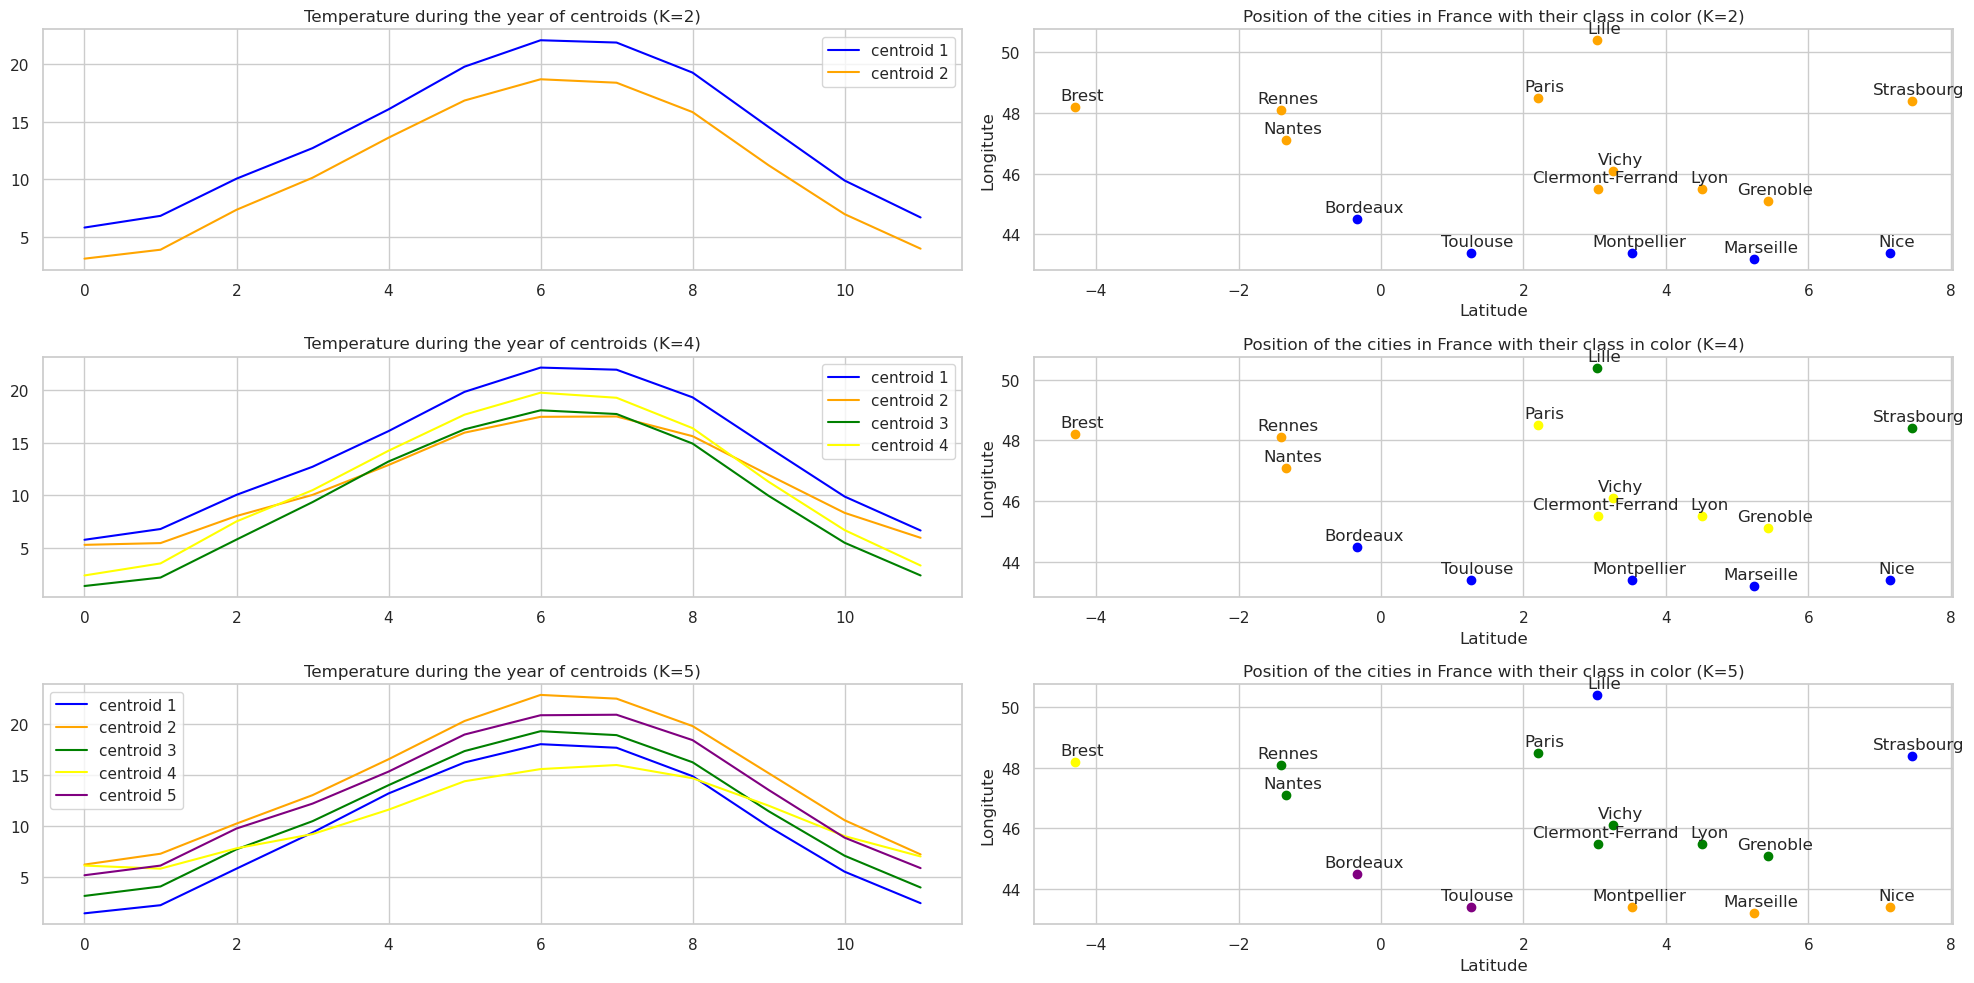

In [115]:
# Initialize KMeans

K_list = [2, 4, 5]

fig, ax = plt.subplots(len(K_list), 2, figsize=(20, 10))  # 3 rows, 2 columns

for i,k in enumerate(K_list):

    # K-means
    kmeans = KMeans(n_clusters=k, n_init = "auto",)
    kmeans_x1 = kmeans.fit(x1)
    centroids_x1 = kmeans_x1.cluster_centers_
    class_x1 = kmeans_x1.predict(x1)

    colors = ["blue", "orange", "green", "yellow", "purple"] 
    class_labels = {0: "Cluster 1", 1: "Cluster 2", 2: "Cluster 3", 3: "Cluster 4", 4: "Cluster 5"}  # Map each class to a label
    
    # Plot of the centroids
    for index in range(centroids_x1.shape[0]):
        ax[i,0].plot(np.arange(12), centroids_x1[index], c = colors[index], label = f"centroid {index+1}")

    ax[i,0].set_title(f"Temperature during the year of centroids (K={k})")
    ax[i,0].legend()

    ### Plot of the position of the cities in France with their class in color
    plotted_classes = set()
    
    for j, label in enumerate(temper_data["villes"]):
        class_j = class_x1[j]
        
         # Scatter plot of the city with the color for its class
        if class_j not in plotted_classes:
            # If the class hasn't been plotted yet, add the label
            ax[i,1].scatter(lati_longi[j, 1], lati_longi[j, 0], c=colors[class_j], label=class_labels[class_j])
            plotted_classes.add(class_i)  # Mark the class as plotted
        else:
            # If the class has been plotted, don't add the label
            ax[i,1].scatter(lati_longi[j, 1], lati_longi[j, 0], c=colors[class_j])
        
        # Annotate each city   
        ax[i,1].annotate(label, (lati_longi[j, 1], lati_longi[j, 0]), textcoords="offset points", xytext=(5,5), ha='center')
    
        ax[i,1].set_title(f'Position of the cities in France with their class in color (K={k})' )
        ax[i,1].set_xlabel("Latitude")
        ax[i,1].set_ylabel("Longitute")

plt.tight_layout() 
plt.show()

Clustering with K=2 simply separates cities into "North-South", which is not so bad. In my opinion, clusterings with K=4 and k=5 are bad: we have clusters made up
of a single city. Clustering with K=5 even classifies Paris and Toulouse in the same cluster... Clustering with K=3 seemed the most appropriate to me.

#### question 2.1.3 (digits data)

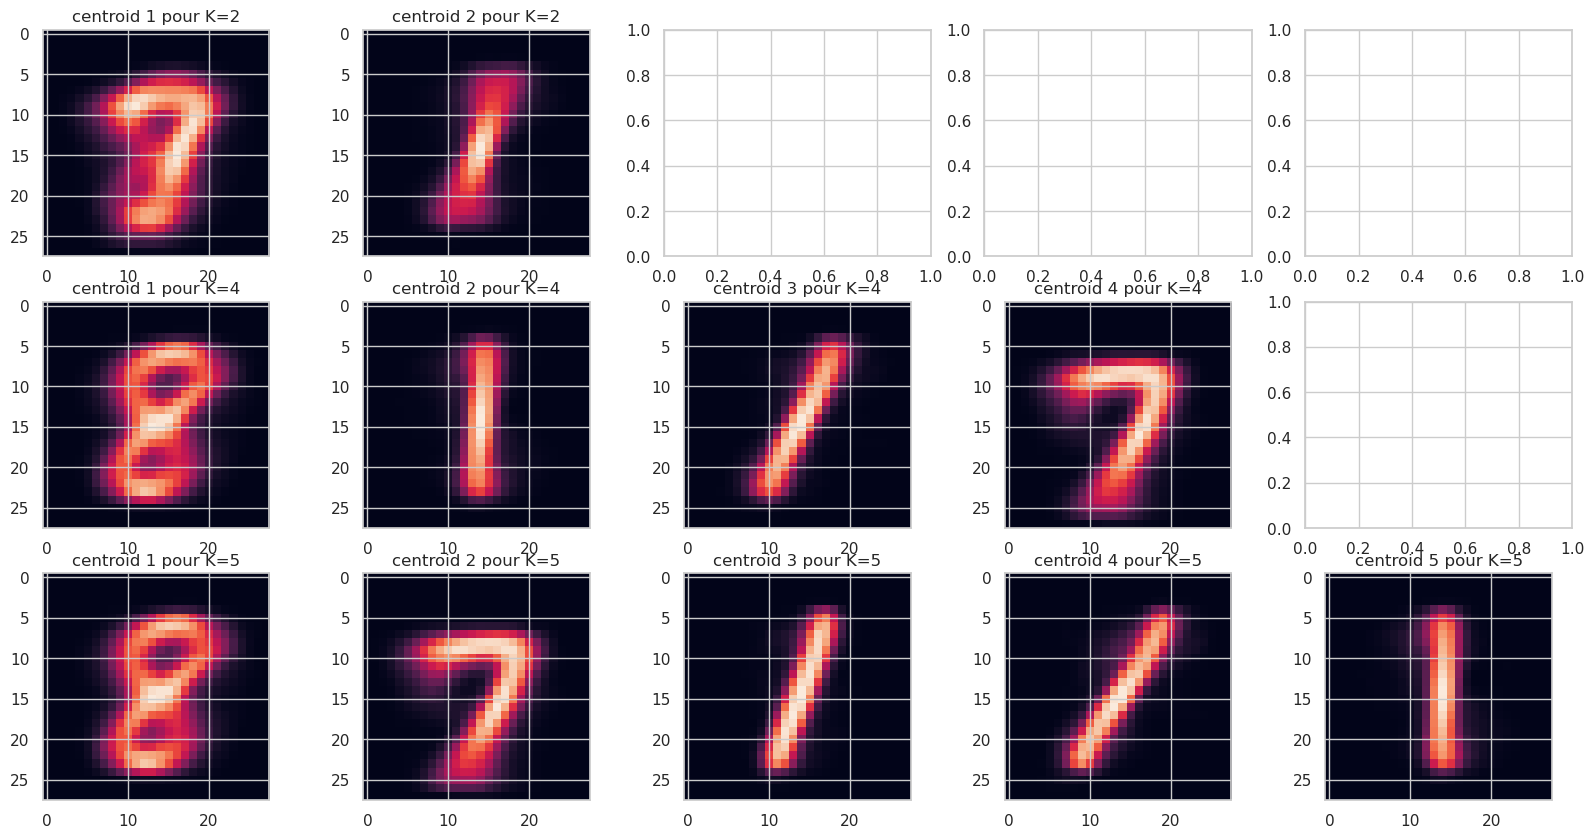

In [122]:
K_list = [2, 4, 5]
fig, ax = plt.subplots(len(K_list), np.max(K_list) , figsize=(20, 10))  # 3 rows, max(K_list) columns

for i,k in enumerate(K_list):
    # K-means
    kmeans = KMeans(n_clusters=k, n_init = "auto",)
    kmeans_x2 = kmeans.fit(x2)
    centroids_x2 = kmeans_x2.cluster_centers_
    class_x2 = kmeans_x2.predict(x2)

    for j,centroid in enumerate(centroids_x2):

        ax[i,j].imshow(centroid.reshape(28, 28))  
        ax[i,j].set_title(f"centroid {j+1} pour K={k}")

We know a priori that the best number of cluster is 3 since there are only three different digits in the data. But it is still interesting to observe that when the k increases, the new centroids are just a "1" somehow different. And even without knowing the true number of digits, it's quite simple to infer here that the right K is 3.

### 2.2

#### question 2.2.1

I deem that the question talks about the clustering for K=3. We can see (Question 2.1.2 temper data) that the cities in Bretagne are together, the cities in South are together and the others are together, which make sense. The climat in Bretagne is special and weather is warmer in the south. Others cities like Paris, Strasbourg etc has indeed a climate quite similar.

#### question 2.2.2

As before, i deem that the question talks about the clustering for K=3. As we have seen before, on the plot of the Question 2.1.2 temper data), cities in the same cluster tend to be close together. We have a cluster for the South, a cluster for Bretagne and a cluster for center, North and East. The clustering suits well with geographical position.

### 2.3

#### question 2.3.1

I deem that the question talks about the clustering with K = 3. The pictures of centroid look like true images from the datasets but they are quite fuzzy. I think that we can tell whether an image is a true image or a centroid image, but it is not absolutely clear. I think that centroid pictures are fuzzy because of that digits are not always centered on the picture.

#### question 2.3.2

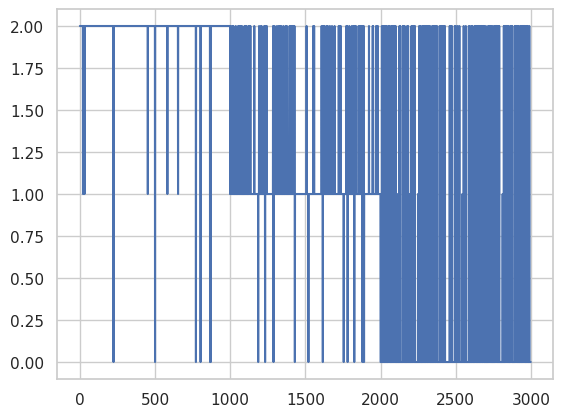

In [137]:
plt.plot(np.arange(class_x2.shape[0]), class_x2)

#### question 2.3.3

#### question 2.3.4

## 3 - Density estimation